In [1]:
import pydotplus 
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, mean_squared_error
import numpy as np
import string
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric" 

german_data_arr = np.genfromtxt("german.data-numeric")
german_data_arr_no_target = np.delete(german_data_arr, 24, 1)

In [3]:
german_data = pd.DataFrame(german_data_arr_no_target)
german_exp_data = pd.DataFrame(german_data_arr)

#german_data.feature_names = ["Status", "Duration", "Purpose", "Credit amount", "Savings account/bonds", \
#                             "Present employment since", "Installment rate", "Personal status and sex", \
#                             "Other debtors", "Present residence", "Property", "Age", "Other installment plans", \
#                             "Housing", "Number of existing credits at this bank", "Job", \
#                             "Number of people being liable to provide maintenance for", "Telephone", \
#                             "foreign worker", "A", "B", "C", "D", "E"]
german_data.columns = [string.uppercase[i] for i in range(0, 24)]
german_data.feature_names = string.uppercase[0:24]
#german_data.feature_names = range(24)
german_data['target'] = german_exp_data[24]
german_data.target_names = ['good', 'bad']
german_data.head(10)

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,target
0,1.0,6.0,4.0,12.0,5.0,5.0,3.0,4.0,1.0,67.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2.0,48.0,2.0,60.0,1.0,3.0,2.0,2.0,1.0,22.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
2,4.0,12.0,4.0,21.0,1.0,4.0,3.0,3.0,1.0,49.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,42.0,2.0,79.0,1.0,4.0,3.0,4.0,2.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,24.0,3.0,49.0,1.0,3.0,3.0,4.0,4.0,53.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
5,4.0,36.0,2.0,91.0,5.0,3.0,3.0,4.0,4.0,35.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,4.0,24.0,2.0,28.0,3.0,5.0,3.0,4.0,2.0,53.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7,2.0,36.0,2.0,69.0,1.0,3.0,3.0,2.0,3.0,35.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,4.0,12.0,2.0,31.0,4.0,4.0,1.0,4.0,1.0,61.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9,2.0,30.0,4.0,52.0,1.0,1.0,4.0,2.0,3.0,28.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0


In [4]:
german_sample = german_data.sample(n = 13, random_state = 111)

In [5]:
model = tree.DecisionTreeClassifier()
model.fit(german_sample.iloc[:, :-1], german_sample.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=german_data.feature_names,
                         class_names = german_data.target_names,
                         filled=True, rounded=True,  
                         special_characters=True) 

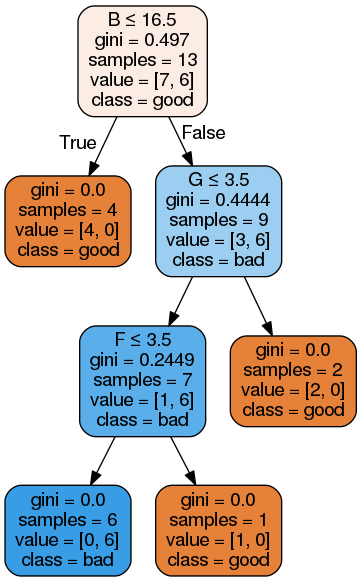

In [7]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())  

In [8]:
model.fit(german_data.iloc[:, :-1], german_data.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [9]:
dot_data = tree.export_graphviz(model, out_file="big_tree.out", 
                         feature_names=german_data.feature_names,  
                         class_names=german_data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

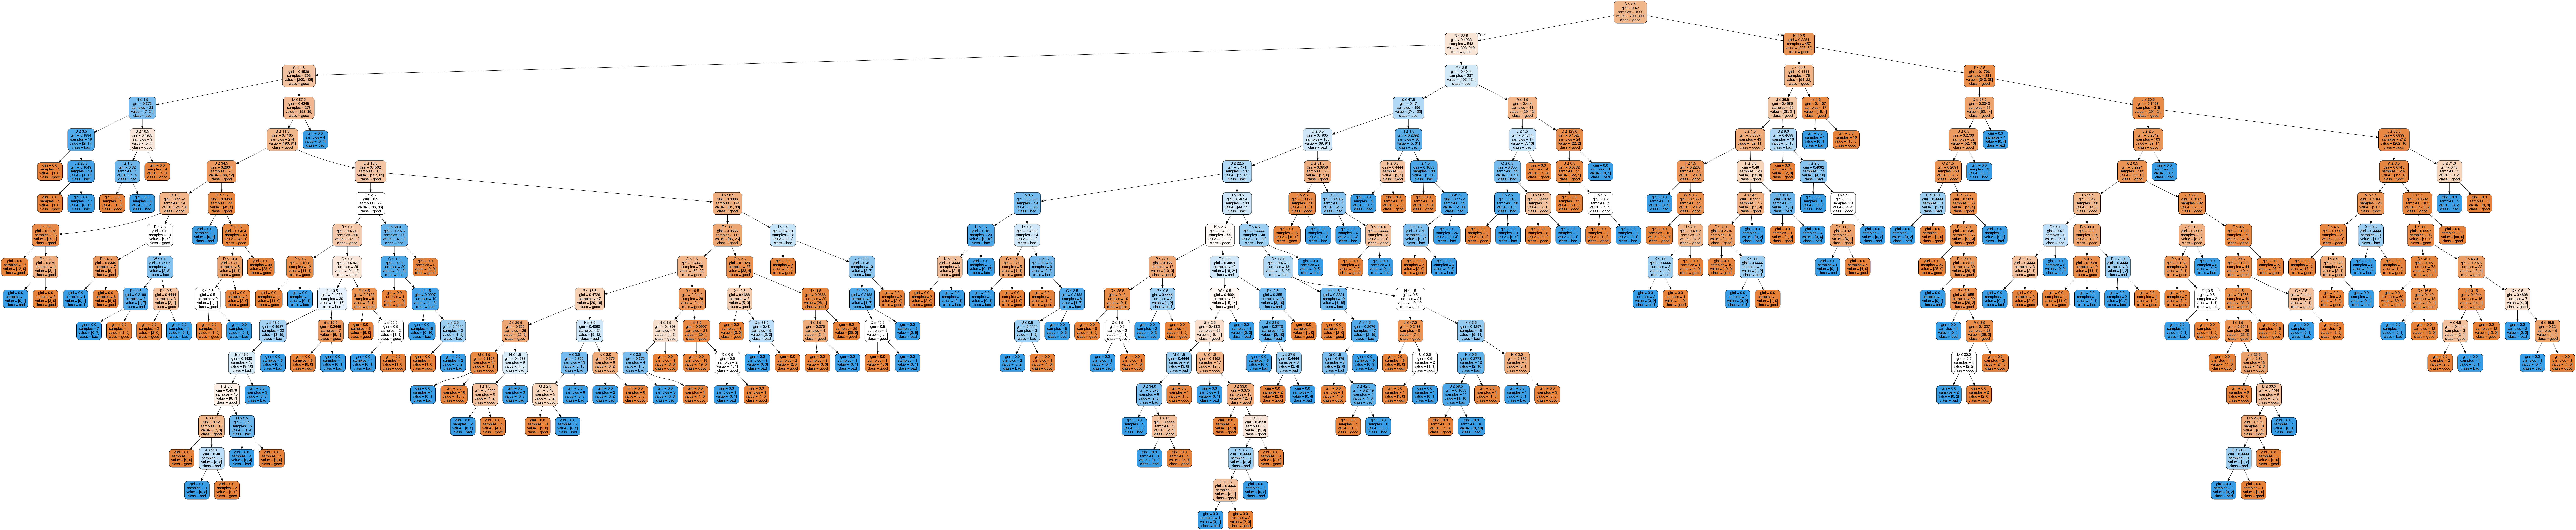

In [10]:
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())  

Первое разбиение по признаку $A \le 2.5$. Признак $A$ - состояние существующей расчетной учетной записи: количество месячных выплат/зарплата за год. <br>
Если $A \le 2.5$, то следующее разбиение по признаку $B$ - время, на которое был выдан креит в месяцах. Если $B \le 22.5$, то далее разбиение по признаку $C$ - кредитная история... Если же $B > 22.5$, то рабиение по признаку $E$ - размер кредита... <br>
Если же $A > 2.5$, то следующее разбиение по признаку $K$ - нынешнее место проживания, и с какого времени оно таковым является...

In [12]:
german_train_data, german_test_data, german_train_labels, german_test_labels = \
train_test_split(german_data.iloc[:, :-1], german_data.target, test_size = 0.2)

In [13]:
train_acc = []
for k in range(1, 200):
    model = tree.DecisionTreeClassifier(max_depth=k)
    model.fit(german_train_data, german_train_labels)
    predictions = model.predict(german_train_data)
    train_acc.append(f1_score(german_train_labels, predictions))

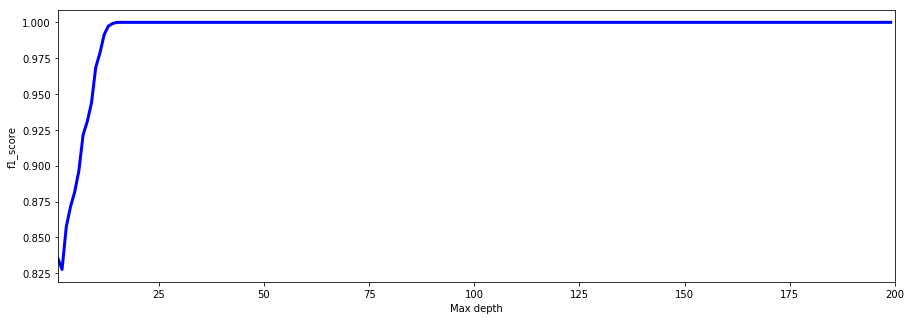

In [14]:
plt.figure(figsize = (15, 5))
plt.plot(range(1,200), train_acc, linewidth = 3.0, color = 'b')
plt.xlabel("Max depth")
plt.ylabel("f1_score")
plt.xlim((1, 200))
plt.show()

In [19]:
test_acc = []
for k in range (1, 200):
    estimator = tree.DecisionTreeClassifier(max_depth = k)
    test_acc.append(np.mean(cross_val_score(estimator, german_data.iloc[:, :-1], german_data.target - 1, cv=5, scoring='f1')))

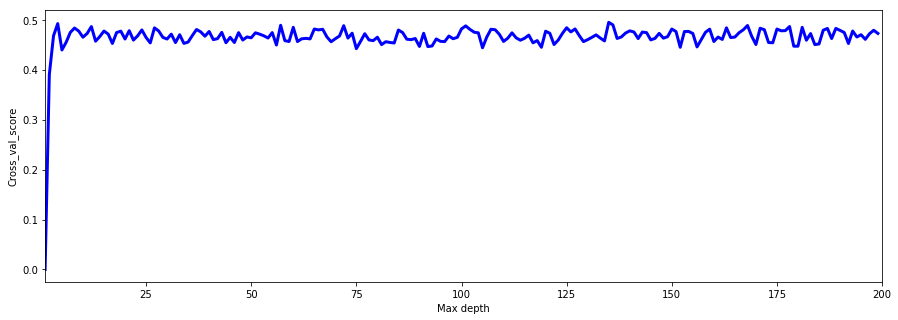

In [20]:
plt.figure(figsize = (15, 5))
plt.plot(range(1,200), test_acc, linewidth = 3.0, color = 'b')
plt.xlabel("Max depth")
plt.ylabel("Cross_val_score")
plt.xlim((1, 200))
plt.show()